In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
from google.colab import drive
drive.mount('/content/gdrive') #mounting google drive for reading data in the future

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
import os
df = pd.read_csv('/content/gdrive/My Drive/AI/sales_train.csv') #read csv from google drive
df #output data (type:dataframe)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [67]:
data = df.values 

In [68]:
years = [] 
months = []
monthsales = []
for i in range(data.shape[0]):
  if data[i][0][-4:] not in years:
    years.append(data[i][0][-4:])
  if data[i][0][3:] not in months:
    months.append(data[i][0][-7:])
    monthsales.append(data[i][4])
  else:
    for j in range(len(months)):
      if data[i][0][3:] == months[j]: 
        monthsales[j] += data[i][4] 

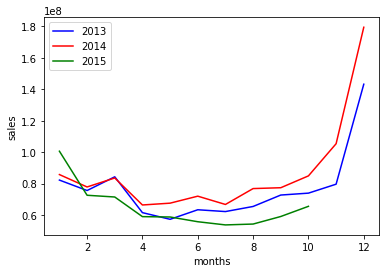

In [69]:
c = ['b', 'r', 'g']
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11 ,12] 
for i in range(len(years)): 
  if years[i] != '2015':
    plt.plot(month, monthsales[12*i:12*i+12], color = c[i], label=years[i]) 
  else:
    plt.plot(month[:10], monthsales[12*i:12*i+13], color = c[i], label=years[i])
plt.xlabel('months')
plt.ylabel('sales')
plt.legend(loc = 'upper left') 
plt.show()

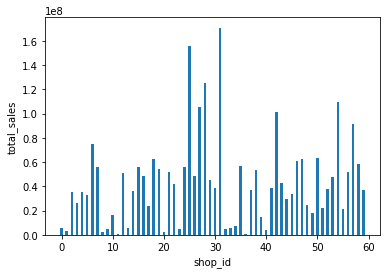

In [110]:
df_data = df.groupby(['shop_id']).sum()
shop_id = np.array(df_data.index)
item_price = np.array(df_data['item_price'])
plt.bar(shop_id,item_price,width=0.5)
plt.xticks(rotation='horizontal')
plt.xlabel('shop_id')
plt.ylabel('total_sales')
plt.show()